# Preprocessament

El primer que necessitarem és definir un DataFrame de 20 elements, amb números aleatoris entre 1 i 10, i que seguisquen el que es coneix com una distribució *normal* (veurem després què és això).

Per a això farem ús de les llibreríes *pandas* i *numpy*.

In [3]:
# Importem les llibreries
import pandas as pd
import numpy as np

# Generem 20 valors aleatoris entre 1 i 10, 
# seguint una distribució normal
# loc: Valor promig que volem
# scale: Desviació estàmdard
dades = np.random.normal(loc=5, scale=2, size=20)

# Creem el DataFrame
df = pd.DataFrame(np.round(dades))

# Mostra el DataFrame
print(df)



       0
0    9.0
1    5.0
2    2.0
3    3.0
4    4.0
5    7.0
6    5.0
7    1.0
8    6.0
9    5.0
10   3.0
11   3.0
12   5.0
13   3.0
14   4.0
15   4.0
16   6.0
17   2.0
18  10.0
19   3.0


## Mesures de centralitat

Una vegada definit, anem a veure com calculem les diferents mesures de centralitat.

In [4]:
# Mesures de centralitat:
print("Mitjana: ",df.mean())
print("Mediana: ",df.median())
print(df.mode())

Mitjana:  0    4.5
dtype: float64
Mediana:  0    4.0
dtype: float64
     0
0  3.0


In [5]:
# Els valors anteriors es mostren en un format de DataFrame,
# indicant la columna també de la que s'ha calcula la mesura
# Si volem només veure els valors, accedim al primer índex:
print("Mitjana: ",df.mean()[0])
print("Mediana: ",df.median()[0])
print(df.mode()[0][0])

Mitjana:  4.5
Mediana:  4.0
3.0


Moltes vegades també és convenient representar de forma gràfica de les dades. Una representació interessant és l'histograma, que mostra com es distribueixen aquestes.

Veiem com fer-ho:

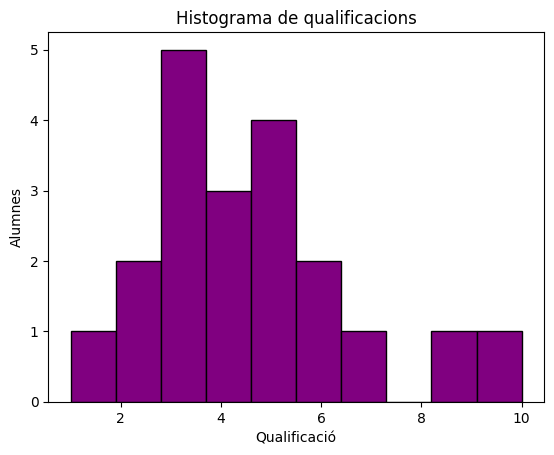

In [6]:
# Importem la llibreria matplotlib
import matplotlib.pyplot as plt

vectorDades=df[0] # Convertim a un vector el Dataframe
plt.hist(vectorDades, color="purple", ec="black")
plt.xlabel("Qualificació")
plt.ylabel("Alumnes")
plt.title("Histograma de qualificacions")

plt.show()

## Mesures de dispersió

Anem a calcular ara les mesures de dispersió de les qualificacions anteriors. Farem ús tant de Pandas com de NumPy.

In [7]:
# Càlculs amb NumPy

# Necessitem un vector amb les dades
dades_numpy=np.round(dades)

# Càlculs
print("Rang:", np.max(dades_numpy) - np.min(dades_numpy))
print("Variança poblacional:",np.var(dades_numpy))
# Per a la variança mostral fem ús del paràmetr ddpf=1, 
# Si no posem res, s'assumeix 0, que es correspon a la variança poblacional.
print("Variança de la mostra:", np.var(dades_numpy, ddof=1))
print("Desviació estàndard poblacional", np.std(dades_numpy))
print("Desviació estàndard de la mostra:",np.std(dades_numpy,ddof=1))

# Rang interquartílic
Q1=np.percentile(dades_numpy,25)
Q3=np.percentile(dades_numpy,75)
print("Rang Interquartílic:",Q3-Q1)



Rang: 9.0
Variança poblacional: 4.95
Variança de la mostra: 5.2105263157894735
Desviació estàndard poblacional 2.224859546128699
Desviació estàndard de la mostra: 2.2826577307580465
Rang Interquartílic: 2.25


In [8]:
# Càlculs amb Pandas

# redefinim el DataFrame
df = pd.DataFrame(np.round(dades))

# Càlculs
df.max()
print("Rang:", df.max() - df.min())
print("Variança:",df.var())
print("Desviació típica: ", df.std())
# Rang interquartílic
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
print("Rang Interquartílic:",Q3-Q1)

Rang: 0    9.0
dtype: float64
Variança: 0    5.210526
dtype: float64
Desviació típica:  0    2.282658
dtype: float64
Rang Interquartílic: 0    2.25
dtype: float64


# Distribució Normal

## Distribució uniforme

en la distribució uniforme tots els valors tenen la mateixa probabilitat d'aparéixer. Per generar vectors amb una distribució uniforme disposem de `random.rand` i `random.uniform`.

In [9]:
# Generació de 100 números aleatoris entre o i 1

dist_uniforme_1=np.random.rand(100)


In [10]:
# Generació de 100 números aleatoris entre o i 1
# en forma de matriu de 10x10

dist_uniforme_1_matriu=np.random.rand(10,10)

In [11]:
# Generació de 100 números aleatoris entre 1 i 10
# de forma uniforme

dist_uniforme_2=np.random.uniform(1, 10, size=100)

In [12]:
# Generació de 100 números aleatoris entre 1 i 10,
# en forma de matriu de 10x10

dist_uniforme_2_matriu=np.random.uniform(1, 10, size=(10,10))

Veiem amb matplotlib quin aspecte tindria l'histograma d'aquesta distribució. Recordem que la fucnió per dibuixar l'histograma, de manera predeterminada estableix 10 particions del rang de valors. Si volem modificar aquest valor, farem ús del paràmetre `bins`.

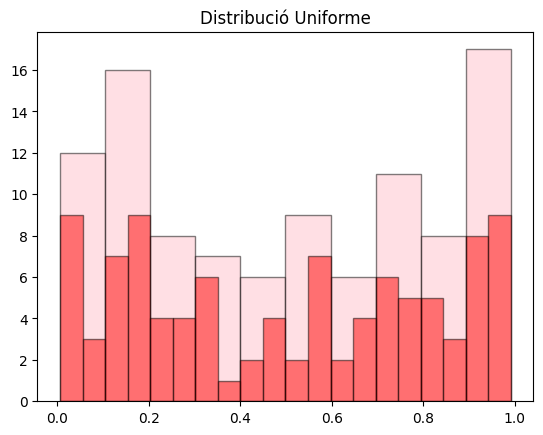

In [13]:
import matplotlib.pyplot as plt

plt.hist(dist_uniforme_1, color="pink", ec="black", alpha=0.5)
# Amb 20 particions
plt.hist(dist_uniforme_1, color="red", ec="black", alpha=0.5, bins=20)
plt.title("Distribució Uniforme")
plt.show()

## Distribució Normal

La distribució normal agrupa la majoria de valors al voltant del valor promig, amb major o menor dispersió.

In [14]:
# Generació d'un vector de 100 elements seguint una 
# distribució normal

dist_normal_1=np.random.randn(100)

# I en forma de matriu

dist_normal_1_matriu=np.random.randn(10,10)

In [15]:
# Generació d'un vector de 100 elements seguint una 
# distribució normal, mitjana 5 i desviació 3

dist_normal_2=np.random.normal(size=100, loc=5, scale=3)

# I en forma de matriu

dist_normal_2_matriu=np.random.normal(size=[10,10], loc=5, scale=3 )

Veiem l'histograma resultant:

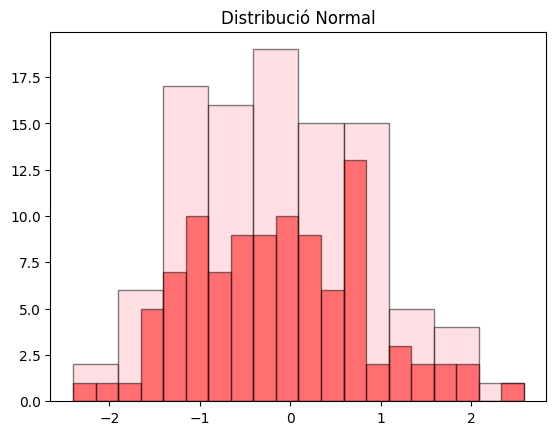

In [16]:
import matplotlib.pyplot as plt

plt.hist(dist_normal_1, color="pink", ec="black", alpha=0.5)
# Amb 20 particions (bins)
plt.hist(dist_normal_1, color="red", ec="black", alpha=0.5, bins=20)
plt.title("Distribució Normal")
plt.show()

## Distribució exponencial

Una distribució exponencial s'utilitza pe modelar temps d'espera pe a l'ocurrència d'esdeveniments.

In [17]:
# Generació d'un vector de 100 números aleatoris seguint
# una distribució normal, amb una taxa de 0.2:
dist_exponencial=np.random.exponential(size=100, scale=1/0.2)

L'histograma corresponent seria:

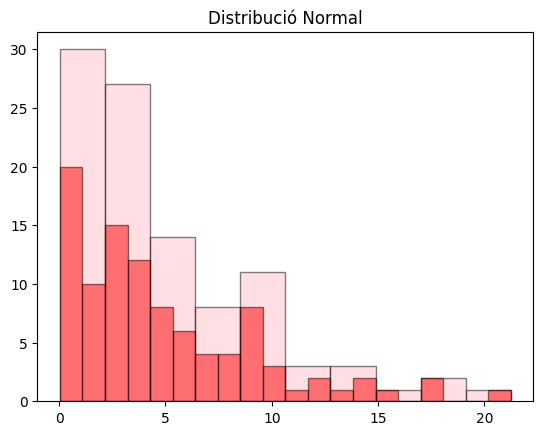

In [18]:
import matplotlib.pyplot as plt

plt.hist(dist_exponencial, color="pink", ec="black", alpha=0.5)
# Amb 20 particions
plt.hist(dist_exponencial, color="red", ec="black", alpha=0.5, bins=20)
plt.title("Distribució Normal")
plt.show()

Veiem ara els tres gràfics conjuntament.

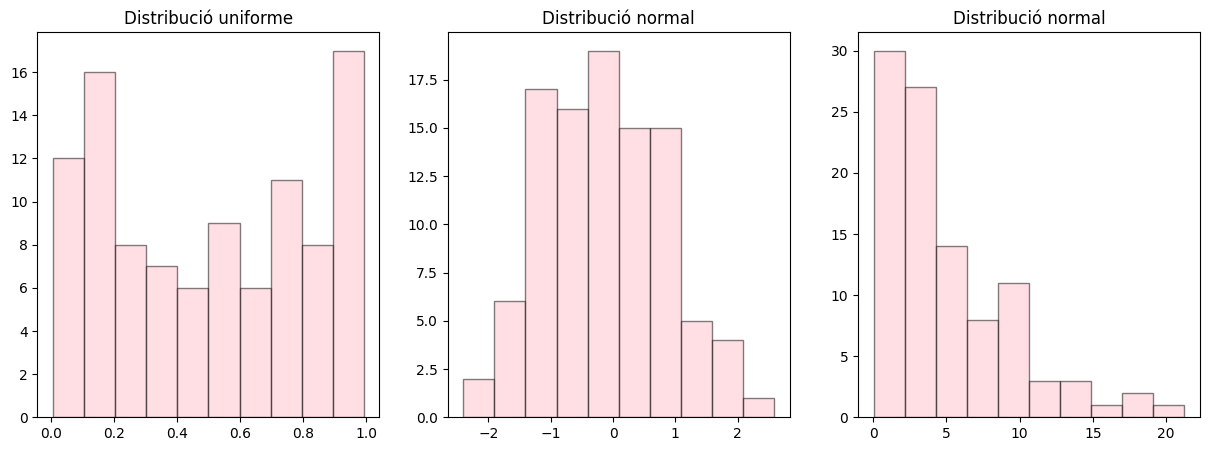

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(dist_uniforme_1, color="pink", ec="black", alpha=0.5)
plt.title("Distribució uniforme")
plt.subplot(1,3,2)
plt.hist(dist_normal_1, color="pink", ec="black", alpha=0.5)
plt.title("Distribució normal")
plt.subplot(1,3,3)
plt.hist(dist_exponencial, color="pink", ec="black", alpha=0.5)
plt.title("Distribució normal")
plt.show()

## Distribució de la probabilitat

La següent funció calcula la funció de distribució de probabilitat, donada la mitjana i la variança.

Tenim en compte que tot i tractar-se d'una funció de variable contínua, necessitarem un rang de valors discret per poder dibuixar-la, així que obtenim una sèrie per a `x` i calculem el valor de la `fdp` per a cada valor.

In [20]:
import numpy as np

def fdp(mu, sigma2):
    # Definim un rang de valors per a X 
    # (X és contínua, però matplotlib necessita un
    # rang discret)
    x = np.linspace(mu - 3 * np.sqrt(sigma2), mu + 3 * np.sqrt(sigma2), 1000)

    # Calculem la funció de distribució de la probabilitat
    fdp = (1 / (np.sqrt(2 * np.pi * sigma2))) * np.exp(-((x - mu) ** 2) / (2 * sigma2))

    return x, fdp
    


Ara podem dibuixar aquesta funció amb:

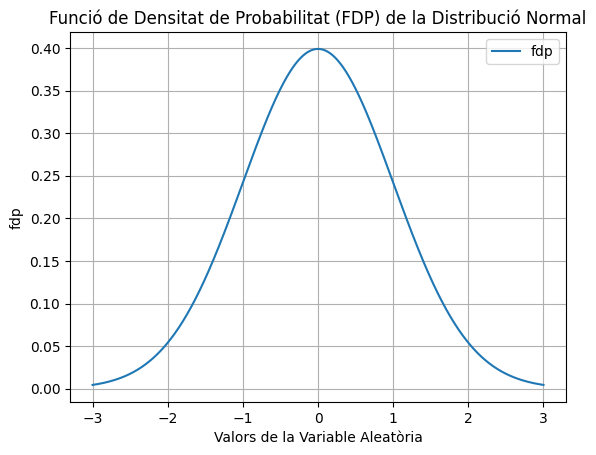

In [21]:

import numpy as np
import matplotlib.pyplot as plt

# Definim la mitjana (mu) i la  # variança.
mitjana = 0    # Mitjana
variança = 1   # Variança (no desviació estàndar)
x, y = fdp(mitjana, variança)

plt.plot(x, y, label='fdp')
plt.title('Funció de Densitat de Probabilitat (FDP) de la Distribució Normal')
plt.xlabel('Valors de la Variable Aleatòria')
plt.ylabel('fdp')
plt.legend()
plt.grid(True)
plt.show()



Anem a crear ara un vector amb 100 valors aleatoris que seguisquen una distribució normal.

Amb aquest vector, obtindrem quina és la mitja i la variança, i calcularem la fdp segons aquests valors.

Finalment, dibuixarem aquests valors corresponents a la fdp junt amb l'histograma (normalitzat), per veure la relació entre ambdós.

L'histograma ens diu com es distribueixen els diferents valors del vector (que equivaldrien a tota la població), mentre que la *fdp* ens diu com es distribueix la probabilitat que donat un valor de *x* s'obtinga un valor de *y*.

La mitjana és:  5.047571550456706
La variança és:  9.110232930580846
La desviació és:  3.0183162409828506


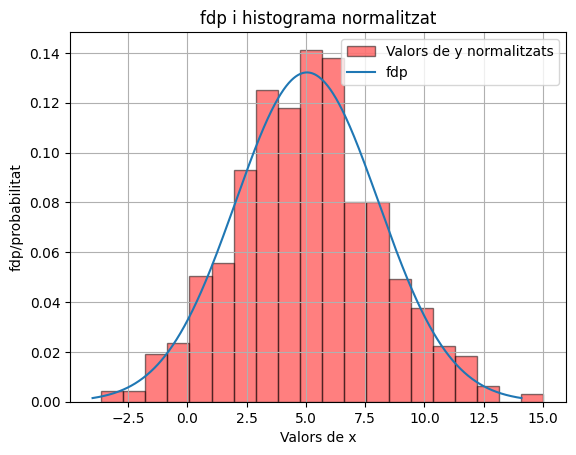

In [22]:
# Creem una distribució normal, amb
# mitja 5 i desviació típica 3, de 100 elements
dist_normal=np.random.normal(loc=5, scale=3, size=1000)

# Calculem i mostrem la mitjana i la variança
mitjana=dist_normal.mean()
variança=dist_normal.var()
desviacio=dist_normal.std()

print("La mitjana és: ", mitjana)
print("La variança és: ", variança)
print("La desviació és: ", desviacio)

# Calculem la funció de densitat de probabilitat
x, y = fdp(mitjana, variança)

# Preparem les llegendes i el títol
plt.title('fdp i histograma normalitzat')
plt.xlabel('Valors de x')
plt.ylabel('fdp/probabilitat')
plt.grid(True)

# Dibuixem l'histograma 
plt.hist(dist_normal, color="red", ec="black", alpha=0.5, bins=20, density=True, label="Valors de y normalitzats")

# Dibuixem la fdp
plt.plot(x, y, label='fdp')

plt.legend()

plt.show()




> Prova a veue l'exemple modificant la quantitat d'elements (size) que generem en la distribució normal i observa com amb major nombre d'elements, s'acosta més a aquesta funció de densitat de probabilitat.

In [23]:
variança

9.110232930580846

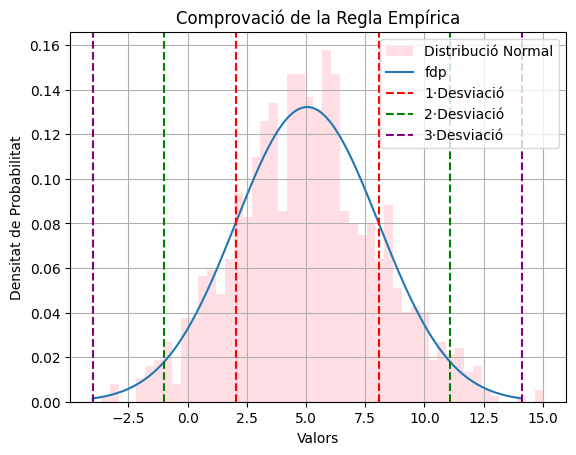

Percentatge d'observacions dins de 1 Sigma: 67.90%
Percentatge d'observacions dins de 2 Sigma: 94.70%
Percentatge d'observacions dins de 3 Sigma: 99.70%


In [24]:
import numpy as np
import matplotlib.pyplot as plt


# Dibuixa l'histograma de la distribució normal anterior
plt.hist(dist_normal, bins=50, density=True, alpha=0.5, color='pink', label='Distribució Normal')

# FPD
x, y = fdp(mitjana, variança)
plt.plot(x, y, label='fdp')

# Compta les observacions dins dels intervals
interval_1_sigma = [mitjana - desviacio, mitjana + desviacio]
interval_2_sigma = [mitjana - 2 * desviacio, mitjana + 2 * desviacio]
interval_3_sigma = [mitjana - 3 * desviacio, mitjana + 3 * desviacio]

observacions_dins_interval_1 = np.sum((dist_normal >= interval_1_sigma[0]) & (dist_normal <= interval_1_sigma[1]))
observacions_dins_interval_2 = np.sum((dist_normal >= interval_2_sigma[0]) & (dist_normal <= interval_2_sigma[1]))
observacions_dins_interval_3 = np.sum((dist_normal >= interval_3_sigma[0]) & (dist_normal <= interval_3_sigma[1]))

# Dibuixa l'aproximació de la Regla Empírica
plt.axvline(interval_1_sigma[0], color='red', linestyle='--', label='1·Desviació')
plt.axvline(interval_1_sigma[1], color='red', linestyle='--')
plt.axvline(interval_2_sigma[0], color='green', linestyle='--', label='2·Desviació')
plt.axvline(interval_2_sigma[1], color='green', linestyle='--')
plt.axvline(interval_3_sigma[0], color='purple', linestyle='--', label='3·Desviació')
plt.axvline(interval_3_sigma[1], color='purple', linestyle='--')

plt.title('Comprovació de la Regla Empírica')
plt.xlabel('Valors')
plt.ylabel('Densitat de Probabilitat')
plt.legend()
plt.grid(True)
plt.show()

# Imprimeix els percentatges d'observacions dins dels intervals
print(f"Percentatge d'observacions dins de 1 Sigma: {observacions_dins_interval_1 / len(dist_normal) * 100:.2f}%")
print(f"Percentatge d'observacions dins de 2 Sigma: {observacions_dins_interval_2 / len(dist_normal) * 100:.2f}%")
print(f"Percentatge d'observacions dins de 3 Sigma: {observacions_dins_interval_3 / len(dist_normal) * 100:.2f}%")

## Matriu de covariança

Anem a definir un Dataframe que emmagatzeme l'edat, junt amb les despeses en medicines, educació i en  cacaus.

In [25]:
import pandas as pd

# Definim el diccionari

dades={
    "edat":[35,50,22,45,18,75,55,20,23,59],
    "medicines":[200,1500,150,250,0,2500,1400,50,0,600],
    "educacio":[1200,0,7500,2200,8300,0,0,4900,5100,800],
    "cacaus":[10,15,0,10,20,10,20,10,15,0],
}

# Definim el DataSet a partir del diccionari
dfDades=pd.DataFrame(dades)

dfDades

,edat,medicines,educacio,cacaus
0,35,200,1200,10
1,50,1500,0,15
2,22,150,7500,0
3,45,250,2200,10
4,18,0,8300,20
5,75,2500,0,10
6,55,1400,0,20
7,20,50,4900,10
8,23,0,5100,15
9,59,600,800,0


Una vegada definit el DataFrane, anem a calcular la desviació estàndard i la variança per a cada paràmetre. En lloc de fer-ho en funcions diferents, anem a fer ús de la funció *aggregate* que ens permet agregar en una mateixa taula el resultat de diverses funcions:

In [26]:
# Abans, però anem a configurar pandas pe a que mostre només dos decimals 
pd.options.display.float_format='{:.2f}'.format

# I calculem la taula
dfDades.aggregate(["std", "var"])

,edat,medicines,educacio,cacaus
std,19.60,851.49,3198.61,6.99
var,384.18,725027.78,10231111.11,48.89


In [27]:
dfDades.aggregate(["std", "var"])

,edat,medicines,educacio,cacaus
std,19.60,851.49,3198.61,6.99
var,384.18,725027.78,10231111.11,48.89


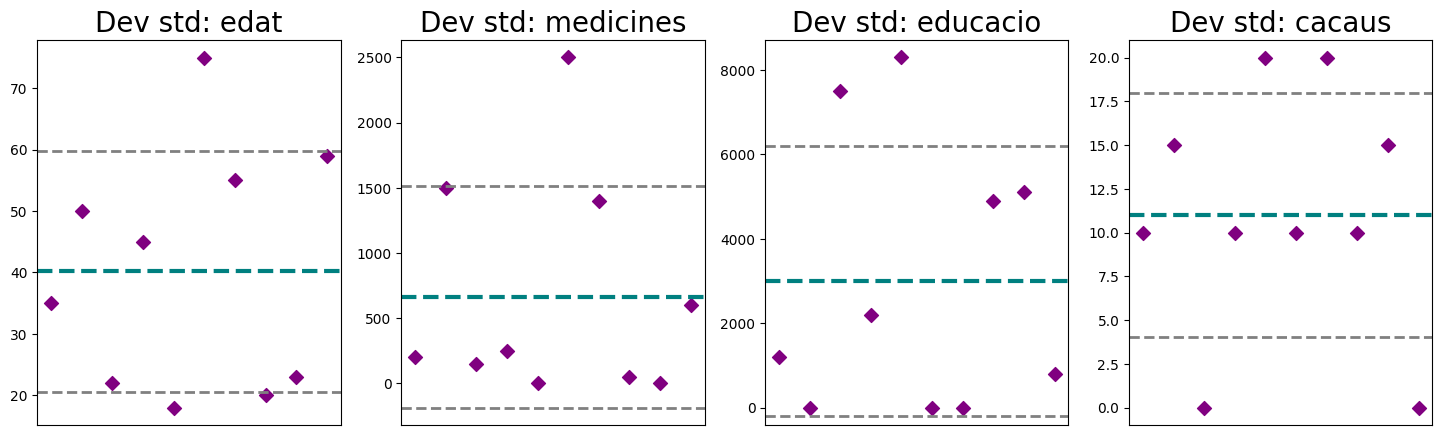

In [28]:

import matplotlib.pyplot as plt

def addSubgraph(fig, dfDades, posicio, parametre):
    # Crea una subfigura amb els paràmetres proporcionats

    # Creem la subfigura en la posició indicada
    ax=fig.add_subplot(1,4,posicio) 
    # Calculem la posició de la mitja
    media=dfDades[parametre].mean() 
    # Calculem la desviació estàndard
    std=dfDades[parametre].std() 

    # Dibuixem els punts pe al paràmetre 
    ax.scatter(range(len(dfDades[parametre])),dfDades[parametre],marker="D",s=50, color="purple")

    # Dibuixem una línia horitzontal per sobre la mitja (a 1 desviació)
    ax.axhline(y=media+std, color="gray", linestyle="--", linewidth=2)
    # Dibuixem la línia horitzontal per a la mitjana
    ax.axhline(y=media, color="teal", linestyle="--", linewidth=3)
    # Dibuixem la linia horitzontal per sota la mitjana (a 1 desviació)
    ax.axhline(y=media-std, color="gray", linestyle="--", linewidth=2)

    # Afegim el títol
    ax.set_title("Dev std: "+parametre, fontsize=20)
    ax.set_xticks(range(len(dfDades[parametre])))
    # Eliminem els missatges de la visualització
    ax.get_xaxis().set_visible(False)


# Creem una figura de proporcions 18,5
fig=plt.figure(figsize=(18,5))  
addSubgraph(fig, dfDades, 1, "edat")
addSubgraph(fig, dfDades, 2, "medicines")
addSubgraph(fig, dfDades, 3, "educacio")
addSubgraph(fig, dfDades, 4, "cacaus")



## Matriu de Covariança

Anem a obtenir ara la matriu de covariança entre les variables anteriors: edat, despeses en medicines, en educació i en cacaus.

In [29]:
# Per calcular les diferents variances per a cada variabele fem:

dfDades.var()

edat             384.18
medicines     725027.78
educacio    10231111.11
cacaus            48.89
dtype: float64

Amb les dades anteriors ja ens fem una idea dels valors de magnitud per a cada variable. 

In [30]:
# Veiem ara la matriu de covariaça

dfDades.cov()

,edat,medicines,educacio,cacaus
edat,384.18,14457.78,-54233.33,-13.00
medicines,14457.78,725027.78,-1923333.33,816.67
educacio,-54233.33,-1923333.33,10231111.11,-500.00
cacaus,-13.00,816.67,-500.00,48.89


              edat  medicines
edat        384.18   14457.78
medicines 14457.78  725027.78 

              edat    educacio
edat        384.18   -54233.33
educacio -54233.33 10231111.11 

         edat  cacaus
edat   384.18  -13.00
cacaus -13.00   48.89 



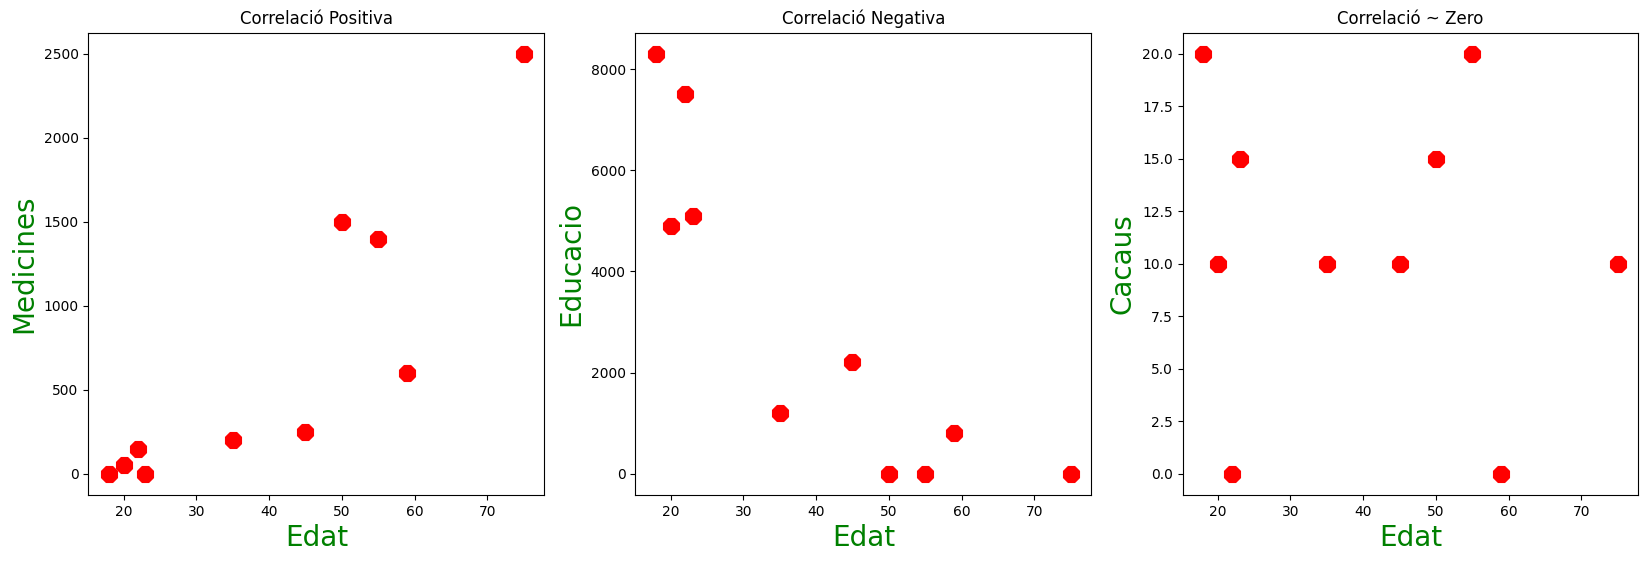

In [31]:
# Gràfics de dispersió

# Aquesta funció rebrà les dades d'un DataFrame, 
# les columnes a estudiar, la figura, l'ordre de la
# figura i un text a mostrar a la part inferior
def graf_dispersio(datos,col_a,col_b, fig, orden, text  ):
  ax=fig.add_subplot(1,3,orden)
  ax.scatter(datos[col_a], datos[col_b], marker="8",s=150, color="red") # s tamaño de marker
  ax.set_xlabel(col_a.capitalize(), fontsize=20, color="green")
  ax.set_ylabel(col_b.capitalize(), fontsize=20, color="green")
  ax.set_title("Correlació "+text)
  

# Obtenim les covariances amb l'edat
print(dfDades[["edat","medicines"]].cov(),"\n")
print(dfDades[["edat","educacio"]].cov(),"\n")
print(dfDades[["edat","cacaus"]].cov(),"\n")

# I veiem gràficament les relacions entre les variables
# en comparació amb l'edat
fig=plt.figure(figsize=(20,6))
graf_dispersio(dfDades,"edat","medicines", fig, 1, "Positiva"  )
graf_dispersio(dfDades,"edat","educacio", fig, 2, "Negativa"  )
graf_dispersio(dfDades,"edat","cacaus", fig, 3, "~ Zero"  )
plt.show()

            medicines    educacio
medicines   725027.78 -1923333.33
educacio  -1923333.33 10231111.11 

           medicines  cacaus
medicines  725027.78  816.67
cacaus        816.67   48.89 

            educacio  cacaus
educacio 10231111.11 -500.00
cacaus       -500.00   48.89 



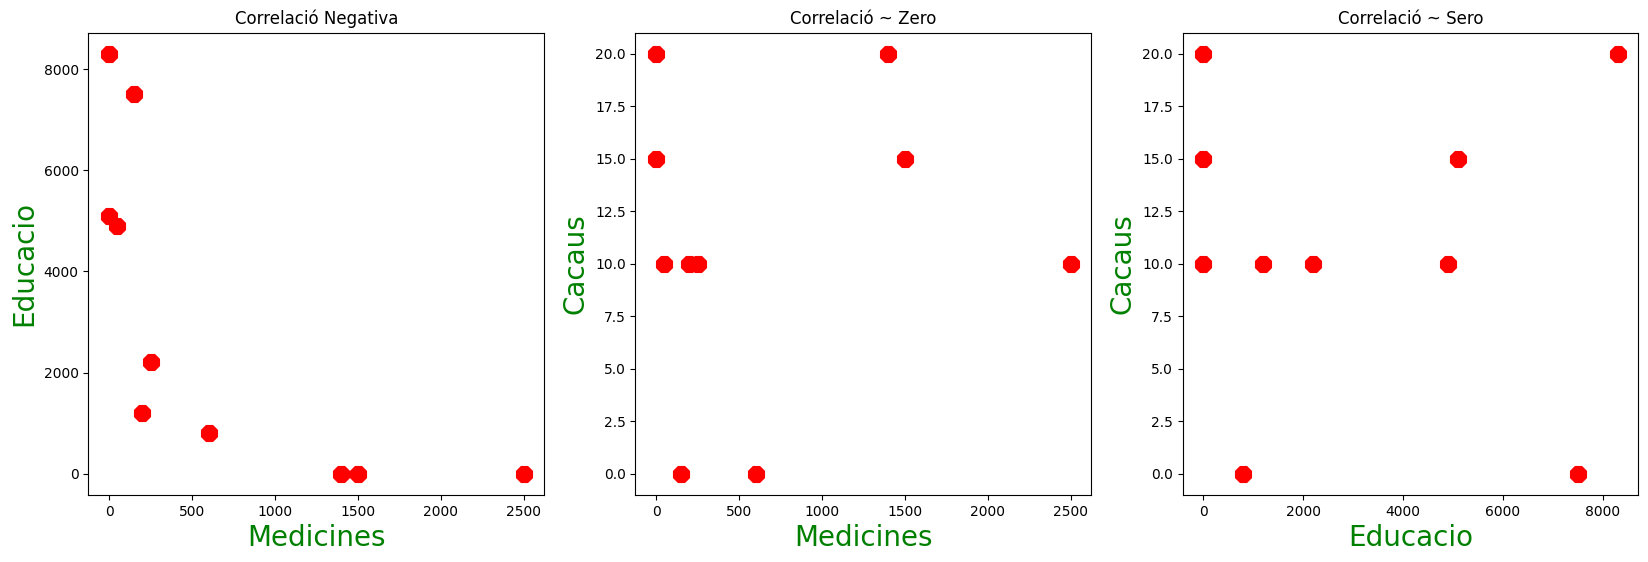

In [32]:
# Calculem ara també les covariances entre la 
# resta de variables
print(dfDades[["medicines","educacio"]].cov(),"\n")
print(dfDades[["medicines","cacaus"]].cov(),"\n")
print(dfDades[["educacio","cacaus"]].cov(),"\n")

# I les mostrem gràficament
fig=plt.figure(figsize=(20,6))
graf_dispersio(dfDades,"medicines","educacio", fig, 1, "Negativa"  )
graf_dispersio(dfDades,"medicines","cacaus", fig, 2, "~ Zero"  )
graf_dispersio(dfDades,"educacio","cacaus", fig, 3, "~ Sero"  )
plt.show()

## Matrius de correlació

In [33]:
# Calculem la matriu de correlació del dataframe anterior amb:

mat_correlacio=dfDades.corr()

mat_correlacio

,edat,medicines,educacio,cacaus
edat,1.00,0.87,-0.87,-0.09
medicines,0.87,1.00,-0.71,0.14
educacio,-0.87,-0.71,1.00,-0.02
cacaus,-0.09,0.14,-0.02,1.00


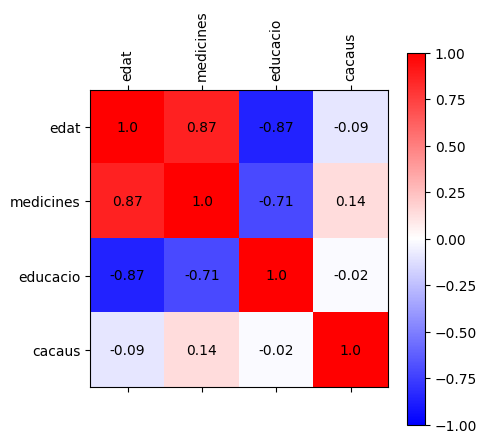

In [34]:
import matplotlib.pyplot as plt

# Pintem un mapa de calor de la matriu

# amb matshow representem el mapa de calor:
# * El primer paràmetre són les dades
# * El segon el mapa de color (colormap)
#   que hem establert amb el valor bwr (blue-white-red), sent
#   el blau per a relacions negatives, el roig positives 
#   i el blanc sense relació. Hi ha molts altres valors 
#   possibles per a aquests paràmetres (Blues, bone, grey, hot...)
plt.matshow(mat_correlacio, cmap="bwr", vmin=-1, vmax=1) 

# Modifiquem les anotacions per als eixos, amb 4 divisions, 
# per a les 4 variables diferents, i establim les etiquetes
# corresponents a cada variable.
# Per a l'eix de les X rotem 90º les etiquetes
plt.xticks(range(4), mat_correlacio.columns, rotation=90)
plt.yticks(range(4), mat_correlacio.columns)

# Dibuixem els valors numèrics amb el mapa. Pera això, 
# recorrem les columnes de la matriu de correlació i representem
# els valors numèrics en la posició corresponent del map.
# Per a això fem ús del mètode text de matplotlib.pyplot.

for i in range(len(mat_correlacio.columns)):
    for j in range(len(mat_correlacio.columns)):
        plt.text(i, j, round(mat_correlacio.iloc[i, j], 2),ha="center", va="center") 
plt.colorbar()
plt.show()



Com a alternativa, podem fer ús de la llibreria Seaborn, especialitzada en mapes de calor. 

In [1]:
# Pas previ: Instal·lació de Seaborn

pip install seaborn

SyntaxError: invalid syntax (437856540.py, line 3)

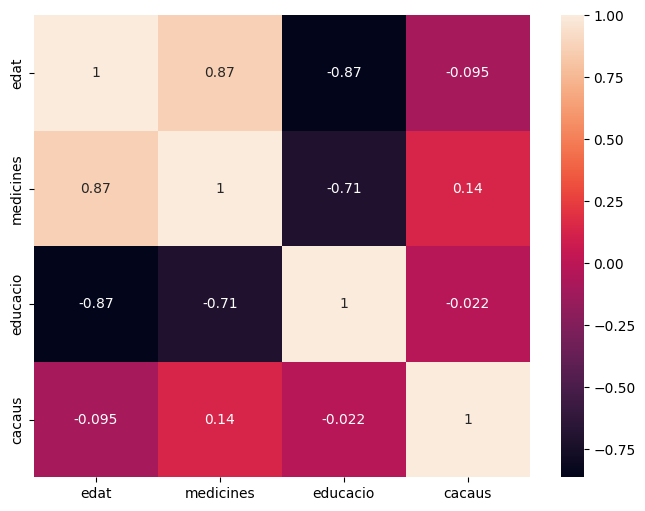

In [35]:
# Mapa de calor amb Seaborn

import seaborn as sns
corr_df = dfDades.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()